# Analysis Repo

This notebook is created to plot **NYC Temperature Data** from 2012 to 2018 using various python libraries. The following libraries were used to achieve the task:

1. Pandas
2. Seaborn
3. Matplotlib
4. Plotly

The data source used is from : [Historical Hourly Weather Data](https://www.kaggle.com/selfishgene/historical-hourly-weather-data/download/66CX79Dkn3oTg1hkOCz5%2Fversions%2FUxMZwcyAxkF5pqUcx9oG%2Ffiles%2Fcity_attributes.csv?datasetVersionNumber=2)

## Step 1: Importing Data
Using pandas we can easily import data from a csv file.

In [1]:
import pandas as pd
temperature_df = pd.read_csv('temperature.csv')
print(temperature_df.head(5))

              datetime   Vancouver    Portland  San Francisco     Seattle  \
0  2012-10-01 12:00:00         NaN         NaN            NaN         NaN   
1  2012-10-01 13:00:00  284.630000  282.080000     289.480000  281.800000   
2  2012-10-01 14:00:00  284.629041  282.083252     289.474993  281.797217   
3  2012-10-01 15:00:00  284.626998  282.091866     289.460618  281.789833   
4  2012-10-01 16:00:00  284.624955  282.100481     289.446243  281.782449   

   Los Angeles   San Diego   Las Vegas     Phoenix  Albuquerque  ...  \
0          NaN         NaN         NaN         NaN          NaN  ...   
1   291.870000  291.530000  293.410000  296.600000   285.120000  ...   
2   291.868186  291.533501  293.403141  296.608509   285.154558  ...   
3   291.862844  291.543355  293.392177  296.631487   285.233952  ...   
4   291.857503  291.553209  293.381213  296.654466   285.313345  ...   

   Philadelphia    New York    Montreal      Boston   Beersheba  \
0           NaN         NaN         N

## Step 2: Sampling Size
We are only concentrating on one location (NYC). Then modifying DataFrame to include one reading out of every 24 rows. Lastly, removing empty cells, if any, from the dataset.

In [2]:
nyc_df = temperature_df[['datetime','New York']]

#Removing reading per day
nyc_df = nyc_df.iloc[::24]

#Removing empty cells
nyc_df.dropna(how='any', inplace=True)
print(nyc_df.head(5))
print(nyc_df.tail(5))

                datetime    New York
24   2012-10-02 12:00:00  289.991473
48   2012-10-03 12:00:00  290.370000
72   2012-10-04 12:00:00  290.840000
96   2012-10-05 12:00:00  293.180000
120  2012-10-06 12:00:00  288.240000
                  datetime  New York
44352  2017-10-23 12:00:00    289.07
44376  2017-10-24 12:00:00    294.23
44400  2017-10-25 12:00:00    286.15
44424  2017-10-26 12:00:00    284.31
44448  2017-10-27 12:00:00    278.44


## Step 3: Changing Temperature Unit

We are changing temperature's unit from Kelvin to Fahrenheit using $ (x − 273.15) × 9/5 + 32 $ formula and lambda function.

In [3]:
nyc_df['New York'] = nyc_df['New York'].apply(lambda x: (x-273.15) * 9/5 + 32)

## Step 4:  Modifying the Datatypes and Housecleaning

As we have loaded our data from a csv file, some of our data types will be objects when Pandas doesn't know what's up. Running `print(nyc_df.info())` shows that date column is interpreted as object, hence should be converted into datetime datatype.


In [4]:
#Converting data types
nyc_df['datetime'] = pd.to_datetime(nyc_df['datetime'])
nyc_df['year'] = nyc_df['datetime'].dt.year
nyc_df['day'] = nyc_df['datetime'].dt.dayofyear




## Step 5: Cleaning

We are renaming the columns to make it understandable. Also, we are reseting the row indexes which were displaced because we dropped empty rows.

In [5]:
#Renaming Columns
nyc_df.columns = ['date','temperature','year','day' ]

#Reseting row indexes
nyc_df.reset_index(inplace=True)

## Step 6: Chart Preparation

We have imported libraries needed for plotting. Next step is to set the dimension of the chart whict is 15 x 7 inches. Then we choose a color pallete for the gragh using seaborn [color palettes](https://seaborn.pydata.org/tutorial/color_palettes.html).

<Figure size 1800x720 with 0 Axes>

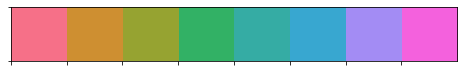

In [6]:
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

#Setting Chart plot and color
plt.figure(figsize=(25, 10))
sns.palplot(sns.color_palette("husl", 8))


## Step 7: Plotting the line chart

We have plotted a line chart using seaborn function `sns.lineplot()`, `lineplot()` can be substituted with any plottype. `.set_title()` titles the chart.

Taking look into the arguments passed:
* `x` and `y` are the column names in our DataFrame which are assigned to **x** and **y** axis respectively.
* `hue` represents the label by which values of Y axis are grouped.
* `data` represents our Pandas DataFrame. 


In [ ]:
#Plotting Data
nyc_chart = sns.lineplot(x="day", y="temperature", hue='year', data=nyc_df ).set_title('NYC Weather Over Time')
plt.show()

Unfortunately, 3 years isn’t long enough of a time period to visually demonstrate that climate change exists: the world’s temperature is projected to rise an average 2–3 degrees Celsius over the span of roughly a couple hundred years, so our chart isn’t useful. It is just to get comfortable with various python libraries with some fun!